In [3]:
import pandas as pd

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import(LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import(mean_absolute_error, mean_squared_error, r2_score)
import pickle

In [4]:
data = pd.read_csv(r'E:\PYTHONCLASSJUPYTER\PrakashSenapati\2024_10_26_Housing_Price_Project\USA_Housing.csv')

In [5]:
data.shape

(5000, 7)

In [7]:
data.head().T

,0,1,2,3,4
Avg. Area Income,79545.458574,79248.642455,61287.067179,63345.240046,59982.197226
Avg. Area House Age,5.682861,6.0029,5.86589,7.188236,5.040555
Avg. Area Number of Rooms,7.009188,6.730821,8.512727,5.586729,7.839388
Avg. Area Number of Bedrooms,4.09,3.09,5.13,3.26,4.23
Area Population,23086.800503,40173.072174,36882.1594,34310.242831,26354.109472
Price,1059033.55787,1505890.914847,1058987.987876,1260616.806629,630943.489339
Address,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...","188 Johnson Views Suite 079\nLake Kathleen, CA...","9127 Elizabeth Stravenue\nDanieltown, WI 06482...",USS Barnett\nFPO AP 44820,USNS Raymond\nFPO AE 09386


In [8]:
X = data.drop(['Price', 'Address'], axis=1) 
y = data['Price']

In [9]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [10]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [14]:
X_train.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2913,80196.242251,6.675697,7.275193,3.17,48694.864144
3275,74130.606324,6.919663,8.266994,3.24,49958.580994
775,67384.000373,7.224281,7.809919,6.43,48918.055356
217,59569.537340,6.279537,7.325380,4.24,31294.652460
1245,58385.215373,7.588559,6.406118,2.30,41930.375009


In [15]:
X_test.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
398,61200.726175,5.299694,6.234615,4.23,42789.692217
3833,63380.814670,5.344664,6.001574,2.45,40217.333577
4836,71208.269301,5.300326,6.077989,4.01,25696.361741
4572,50343.763518,6.027468,5.160240,4.35,27445.876739
636,54535.453719,5.278065,6.871038,4.41,30852.207006


In [16]:
y_train.head(5)

2913    1.616937e+06
3275    1.881075e+06
775     1.930344e+06
217     8.859206e+05
1245    1.266210e+06
Name: Price, dtype: float64

In [17]:
y_test.head(5)

398     894251.068636
3833    932979.360621
4836    920747.911288
4572    691854.921027
636     732733.236293
Name: Price, dtype: float64

In [18]:
models = {
    'LinearRegression': LinearRegression(),
    'RobustRegression': HuberRegressor(),
    'RidgeRegression': Ridge(),
    'LassoRegression': Lasso(),
    'ElasticNet': ElasticNet(),
    'PolynomialRegression': Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression())]),
    'SGDRegressor': SGDRegressor(),
    'ANN': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000),
    'RandomForest': RandomForestRegressor(),
    'SVM': SVR(),
    'LGBM': lgb.LGBMRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'KNN': KNeighborsRegressor()
}

In [19]:
models

{'LinearRegression': LinearRegression(),
 'RobustRegression': HuberRegressor(),
 'RidgeRegression': Ridge(),
 'LassoRegression': Lasso(),
 'ElasticNet': ElasticNet(),
 'PolynomialRegression': Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())]),
 'SGDRegressor': SGDRegressor(),
 'ANN': MLPRegressor(max_iter=1000),
 'RandomForest': RandomForestRegressor(),
 'SVM': SVR(),
 'LGBM': LGBMRegressor(),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
          

In [20]:
results = []

In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })
    
    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(model, f)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1256
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 5
[LightGBM] [Info] Start training from score 1231911.452183


In [25]:
for i in results:
    print(i)

{'Model': 'LinearRegression', 'MAE': 82657.946058922, 'MSE': 10549721686.159279, 'R2': 0.9146454505138069}
{'Model': 'RobustRegression', 'MAE': 199465.55955429267, 'MSE': 61664910393.2493, 'R2': 0.5010881990728193}
{'Model': 'RidgeRegression', 'MAE': 82659.67244409776, 'MSE': 10549745186.670172, 'R2': 0.91464526037841}
{'Model': 'LassoRegression', 'MAE': 82657.9466217223, 'MSE': 10549717660.356375, 'R2': 0.9146454830853386}
{'Model': 'ElasticNet', 'MAE': 99126.80843102589, 'MSE': 15081376466.55959, 'R2': 0.8779812271613102}
{'Model': 'PolynomialRegression', 'MAE': 82894.44762396754, 'MSE': 10604968581.895866, 'R2': 0.9141984648931063}
{'Model': 'SGDRegressor', 'MAE': 8.42046446778976e+17, 'MSE': 7.308031591253262e+35, 'R2': -5.912703317288927e+24}
{'Model': 'ANN', 'MAE': 199249.15581593371, 'MSE': 61446822762.98111, 'R2': 0.5028526789315131}
{'Model': 'RandomForest', 'MAE': 98179.85414778364, 'MSE': 15044878234.958931, 'R2': 0.8782765231139422}
{'Model': 'SVM', 'MAE': 282947.6875869132

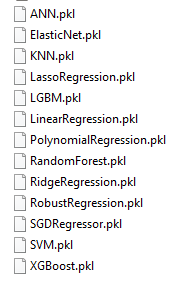

In [26]:
results_df = pd.DataFrame(results)
results_df.to_csv('model_evaluation_results.csv', index=False)

In [27]:
results_df

,Model,MAE,MSE,R2
0,LinearRegression,8.265795e+04,1.054972e+10,9.146455e-01
1,RobustRegression,1.994656e+05,6.166491e+10,5.010882e-01
2,RidgeRegression,8.265967e+04,1.054975e+10,9.146453e-01
3,LassoRegression,8.265795e+04,1.054972e+10,9.146455e-01
4,ElasticNet,9.912681e+04,1.508138e+10,8.779812e-01
5,PolynomialRegression,8.289445e+04,1.060497e+10,9.141985e-01
6,SGDRegressor,8.420464e+17,7.308032e+35,-5.912703e+24
7,ANN,1.992492e+05,6.144682e+10,5.028527e-01
8,RandomForest,9.817985e+04,1.504488e+10,8.782765e-01
9,SVM,2.829477e+05,1.235466e+11,4.227862e-04


In [28]:
print("Models have been trained and saved as pickle files. Evaluation results have been saved to model_evaluation_results.csv.")

Models have been trained and saved as pickle files. Evaluation results have been saved to model_evaluation_results.csv.
